# Worksheet 23

Name: Ryan Chung 
UID: U33101958

### Topics

- Neural Networks

## Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6992
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6981 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6978  
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6976 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6974 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6972  
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6971 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6969 
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6968  
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6966 
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6965 
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6963 
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6962 
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6961 
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6960 
Ep

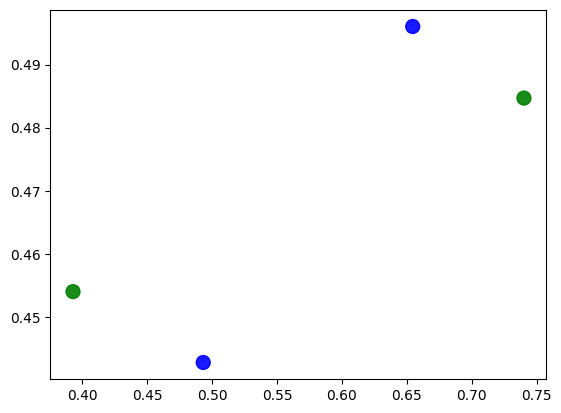

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


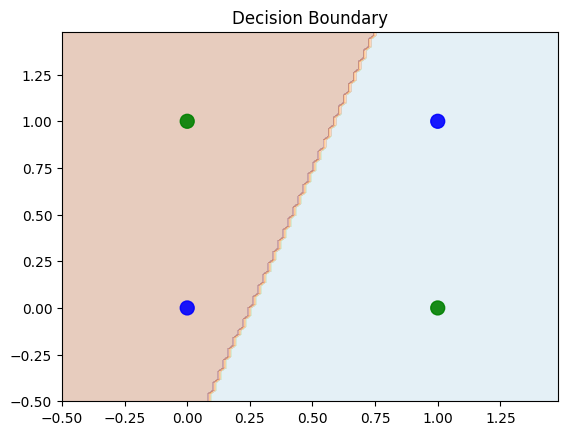

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, random
from tensorflow.keras import layers

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1, random_state=1)

colors = np.array([x for x in 'bgrcmyk'])
colors = np.hstack([colors] * 20)

def generate_xor_data():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([x[0] ^ x[1] for x in X])
    return X, Y

X, Y = generate_xor_data()

# The model
inputs = keras.Input(shape=(2,))
x = layers.Dense(2, activation='sigmoid')(inputs)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy')

# Train the model
history = model.fit(X, Y, batch_size=1, epochs=1000)

# Access the output of the first layer using a new Model instance
intermediate_layer_model = keras.Model(inputs=model.input, outputs=model.layers[1].output)
intermediate_output = intermediate_layer_model.predict(X)

# Visualize the transformation at the first hidden layer
plt.scatter(intermediate_output[:, 0], intermediate_output[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

# Plot decision boundary
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()
